In [1]:
import pandas as pd

In [51]:
df = pd.read_csv('TextClassification_Data_edited.csv', encoding='cp1252', usecols=['SUMMARY', 'categories'])

In [52]:
df.shape

(42164, 2)

In [53]:
df = df.dropna(axis=0, subset=['SUMMARY'])

In [54]:
df.shape

(42164, 2)

In [55]:
df.categories.value_counts()

PRESCRIPTION     12251
APPOINTMENTS     11025
ASK_A_DOCTOR      9986
MISCELLANEOUS     8902
Name: categories, dtype: int64

In [56]:
df.SUMMARY.isnull().value_counts()

False    42164
Name: SUMMARY, dtype: int64

In [57]:
######### balancing dataset
balance_point = 8902
def balance_dataset(df):
    df1 = df[df.categories == 'PRESCRIPTION'].iloc[:balance_point]
    df2 = df[df.categories == 'APPOINTMENTS'].iloc[:balance_point]
    df3 = df[df.categories == 'ASK_A_DOCTOR'].iloc[:balance_point]
    df4 = df[df.categories == 'MISCELLANEOUS'].iloc[:balance_point]


    
    frames = [df1, df2, df3, df4]
    return pd.concat(frames)

df = balance_dataset(df)

In [58]:
### shuffling the dataset
#from sklearn.utils import shuffle
#df = shuffle(df)
df = df.reset_index(drop=True)
df.head()

,SUMMARY,categories
0,pharmacist clld to request early refill for Ty...,PRESCRIPTION
1,z-pack,PRESCRIPTION
2,Adderall Rx,PRESCRIPTION
3,Sch Rov- Rx Refills,PRESCRIPTION
4,Refilll needed appt made,PRESCRIPTION


In [59]:
df.shape

(35608, 2)

In [60]:
df.dtypes

SUMMARY       object
categories    object
dtype: object

In [61]:
df['categories'] = df['categories'].astype('category')

In [62]:
df["categories_cat"] = df["categories"].cat.codes

In [63]:
df

,SUMMARY,categories,categories_cat
0,pharmacist clld to request early refill for Ty...,PRESCRIPTION,3
1,z-pack,PRESCRIPTION,3
2,Adderall Rx,PRESCRIPTION,3
3,Sch Rov- Rx Refills,PRESCRIPTION,3
4,Refilll needed appt made,PRESCRIPTION,3
...,...,...,...
35603,LVMTCB to Confirm 5/4 Appt.,MISCELLANEOUS,2
35604,Rep called to request that orders be signed an...,MISCELLANEOUS,2
35605,Pt needs admission today. Please call Aetna,MISCELLANEOUS,2
35606,B/T Checklist Not Signed,MISCELLANEOUS,2


In [64]:
messages = df.SUMMARY.tolist()

In [65]:
########## finding map class to integer value #############
class0 = df[df.categories_cat == 0].iloc[0].categories
class1 = df[df.categories_cat == 1].iloc[0].categories
class2 = df[df.categories_cat == 2].iloc[0].categories
class3 = df[df.categories_cat == 3].iloc[0].categories
classes = {0 : class0, 1 : class1, 2 : class2, 3 : class3}

In [66]:
classes

{0: 'APPOINTMENTS', 1: 'ASK_A_DOCTOR', 2: 'MISCELLANEOUS', 3: 'PRESCRIPTION'}

In [67]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(messages)):
    message = re.sub('[^a-zA-Z]', ' ', str(messages[i]))
    message = message.lower()
    message = message.split()
    
    message = [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)

[nltk_data] Downloading package stopwords to /home/habib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/habib/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(corpus)
X = vectorizer.transform(corpus).toarray()

In [69]:
X.shape

(35608, 6956)

In [70]:
y = df["categories_cat"]

In [71]:
y

0        3
1        3
2        3
3        3
4        3
        ..
35603    2
35604    2
35605    2
35606    2
35607    2
Name: categories_cat, Length: 35608, dtype: int8

In [72]:
# Train Test Split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [73]:
X_train.shape

(28486, 6956)

In [74]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [75]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 7155]
 [   1 7155]
 [   2 7155]
 [   3 7155]]


In [76]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
################# NB Classifier
NB_model = MultinomialNB().fit(X_train, y_train)

In [78]:
naive_bayes_prediction = NB_model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('naive_bayes accuracy: {}'.format(accuracy_score(y_test, naive_bayes_prediction)))

naive_bayes accuracy: 0.7558270148834597


In [80]:
naive_bayes_prediction

array([2, 2, 1, ..., 0, 3, 1], dtype=int8)

In [91]:
import time
t1=time.time()

In [92]:
################# SVC Classifier
SVC_model = SVC().fit(X_train, y_train)

In [93]:
t2 = time.time()
print('time require for SVC_model training : ', (t2-t1)/3600)

time require for SVC_model training :  1.511224976049529


In [94]:
SVC_prediction = SVC_model.predict(X_test)

In [38]:
SVC_prediction

array([2, 2, 1, ..., 2, 3, 1], dtype=int8)

In [97]:
print('svc accuracy: {}'.format(accuracy_score(y_test, SVC_prediction)))

svc accuracy: 0.7676214546475709


In [37]:
import skopt
print('skopt %s' % skopt.__version__)

skopt 0.8.1


In [46]:

from numpy import mean
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

# define the space of hyperparameters to search
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']


In [39]:

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)

In [40]:
'''
# perform the search
search.fit(X_train, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)
'''

'\n# perform the search\nsearch.fit(X_train, y_train)\n# report the best result\nprint(search.best_score_)\nprint(search.best_params_)\n'

In [44]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,x_label,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10, rotation = 90)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=12)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel(x_label, fontsize=20)

    return plt

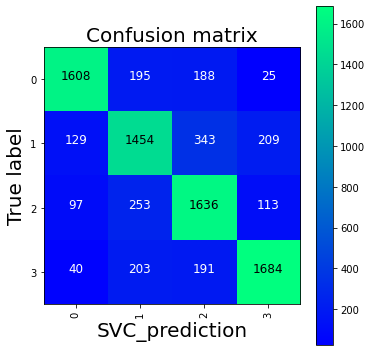

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import combinations
from sklearn.metrics import recall_score, confusion_matrix

cm = confusion_matrix(y_test, SVC_prediction)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=classes,x_label = "SVC_prediction",normalize=False, 
                             title='Confusion matrix')
plt.show()

In [95]:
################# KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [96]:
KNN_prediction = KNN_model.predict(X_test)

In [98]:
print('KNN accuracy: {}'.format(accuracy_score(y_test, KNN_prediction)))

KNN accuracy: 0.6582420668351586


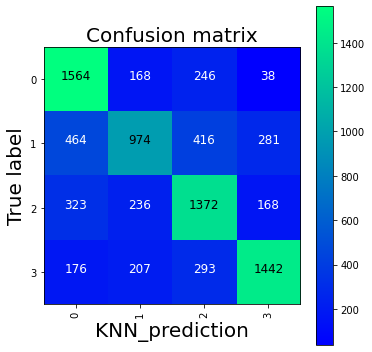

In [49]:
cm = confusion_matrix(y_test, KNN_prediction)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=classes,x_label = "KNN_prediction",normalize=False, 
                             title='Confusion matrix')
plt.show()

In [81]:
################# DecisionTree Classifier
DecisionTree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [82]:
decisionTree_prediction = DecisionTree_model.predict(X_test)

In [83]:
print('DecisionTree accuracy: {}'.format(accuracy_score(y_test, decisionTree_prediction)))

DecisionTree accuracy: 0.7155293456894131


In [43]:
cm = confusion_matrix(y_test, decisionTree_prediction)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=classes,x_label = "decisionTree_prediction",normalize=False, 
                             title='Confusion matrix')
plt.show()

NameError: name 'plt' is not defined

In [84]:
################# Random forest Classifier
RandomForest_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [85]:
random_forest_prediction=RandomForest_model.predict(X_test)

In [86]:
print('Random_forest accuracy: {}'.format(accuracy_score(y_test, random_forest_prediction)))

Random_forest accuracy: 0.7506318449873631


In [47]:
cm = confusion_matrix(y_test, random_forest_prediction)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=classes,x_label = "random_forest_prediction",normalize=False, 
                             title='Confusion matrix')
plt.show()

NameError: name 'plt' is not defined

In [87]:
#################LogisticRegression Classifier
LogisticRegression_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_train,y_train)

In [88]:
LogisticRegression_prediction = LogisticRegression_model.predict(X_test)

In [89]:
print('LogisticRegression accuracy: {}'.format(accuracy_score(y_test, LogisticRegression_prediction)))

LogisticRegression accuracy: 0.7586352148272957


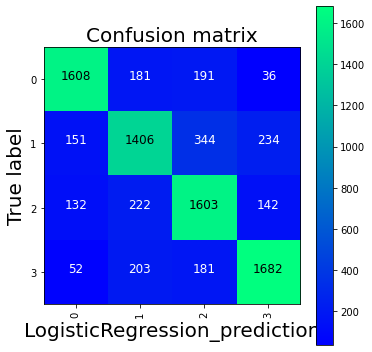

In [61]:
cm = confusion_matrix(y_test, LogisticRegression_prediction)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=classes,x_label = "LogisticRegression_prediction",normalize=False, 
                             title='Confusion matrix')
plt.show()

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('naive_bayes f1_score: {}'.format(f1_score(y_test,naive_bayes_prediction, average='macro')))
print('KNN f1_score: {}'.format(f1_score(y_test,KNN_prediction, average='macro')))
print('SVC f1_score: {}'.format(f1_score(y_test,SVC_prediction, average='macro')))
print('Decision tree f1_score: {}'.format(f1_score(y_test,decisionTree_prediction, average='macro')))
print('Random_forest f1_score: {}'.format(f1_score(y_test,random_forest_prediction, average='macro')))
print('LogisticRegression f1_score: {}'.format(f1_score(y_test,LogisticRegression_prediction, average='macro')))

naive_bayes f1_score: 0.7426993885585613
KNN f1_score: 0.6361968114131243
SVC f1_score: 0.764618059807007
Decision tree f1_score: 0.7057070173370091
Random_forest f1_score: 0.7510029909243836
LogisticRegression f1_score: 0.7536862683687062


In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('naive_bayes f1_score: {}'.format(f1_score(y_test,naive_bayes_prediction, average='macro')))
print('KNN f1_score: {}'.format(f1_score(y_test,KNN_prediction, average='macro')))
print('SVC f1_score: {}'.format(f1_score(y_test,SVC_prediction, average='macro')))
print('Decision tree f1_score: {}'.format(f1_score(y_test,decisionTree_prediction, average='macro')))
print('Random_forest f1_score: {}'.format(f1_score(y_test,random_forest_prediction, average='macro')))
print('LogisticRegression f1_score: {}'.format(f1_score(y_test,LogisticRegression_prediction, average='macro')))

naive_bayes f1_score: 0.7564072318245583


NameError: name 'KNN_prediction' is not defined

In [87]:
print('naive_bayes accuracy: {}'.format(accuracy_score(y_test, naive_bayes_prediction)))
print('KNN accuracy: {}'.format(accuracy_score(y_test, KNN_prediction)))
print('SVC accuracy: {}'.format(accuracy_score(y_test, SVC_prediction)))
print('DecisionTree accuracy: {}'.format(accuracy_score(y_test, decisionTree_prediction)))
print('Random_forest accuracy: {}'.format(accuracy_score(y_test, random_forest_prediction)))
print('LogisticRegression accuracy: {}'.format(accuracy_score(y_test, LogisticRegression_prediction)))

naive_bayes accuracy: 0.7427103250478011
KNN accuracy: 0.6395793499043977
SVC accuracy: 0.7626673040152964
DecisionTree accuracy: 0.7045889101338432
Random_forest accuracy: 0.7498804971319312
LogisticRegression accuracy: 0.7527485659655831


In [76]:
print('naive_bayes accuracy: {}'.format(accuracy_score(y_test, naive_bayes_prediction)))
print('KNN accuracy: {}'.format(accuracy_score(y_test, KNN_prediction)))
print('SVC accuracy: {}'.format(accuracy_score(y_test, SVC_prediction)))
print('DecisionTree accuracy: {}'.format(accuracy_score(y_test, decisionTree_prediction)))
print('Random_forest accuracy: {}'.format(accuracy_score(y_test, random_forest_prediction)))
print('LogisticRegression accuracy: {}'.format(accuracy_score(y_test, LogisticRegression_prediction)))

naive_bayes accuracy: 0.7503163222269085
KNN accuracy: 0.6389708983551244
SVC accuracy: 0.7764656263180093
DecisionTree accuracy: 0.7092647265570083
Random_forest accuracy: 0.7511598481653311
LogisticRegression accuracy: 0.7604386334879798


In [88]:
print('naive_bayes recall_score: {}'.format(recall_score(y_test,naive_bayes_prediction, average='macro')))
print('KNN recall_score: {}'.format(recall_score(y_test,KNN_prediction, average='macro')))
print('SVC recall_score: {}'.format(recall_score(y_test,SVC_prediction, average='macro')))
print('Decision tree recall_score: {}'.format(recall_score(y_test,decisionTree_prediction, average='macro')))
print('Random_forest recall_score: {}'.format(recall_score(y_test,random_forest_prediction, average='macro')))
print('LogisticRegression recall_score: {}'.format(recall_score(y_test,LogisticRegression_prediction, average='macro')))

naive_bayes recall_score: 0.7435755433527754
KNN recall_score: 0.6416188262663682
SVC recall_score: 0.763289492674547
Decision tree recall_score: 0.7056974095552847
Random_forest recall_score: 0.7507041792729354
LogisticRegression recall_score: 0.7535023689413051


In [89]:
print('naive_bayes precision_score: {}'.format(precision_score(y_test,naive_bayes_prediction, average='macro')))
print('KNN precision_score: {}'.format(precision_score(y_test,KNN_prediction, average='macro')))
print('SVC precision_score: {}'.format(precision_score(y_test,SVC_prediction, average='macro')))
print('Decision tree precision_score: {}'.format(precision_score(y_test,decisionTree_prediction, average='macro')))
print('Random_forest precision_score: {}'.format(precision_score(y_test,random_forest_prediction, average='macro')))
print('LogisticRegression precision_score: {}'.format(precision_score(y_test,LogisticRegression_prediction, average='macro')))

naive_bayes precision_score: 0.7433861523694062
KNN precision_score: 0.6426411698421859
SVC precision_score: 0.7679376219409518
Decision tree precision_score: 0.7066329501721867
Random_forest precision_score: 0.7519827736815207
LogisticRegression precision_score: 0.7552217410560146


In [90]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for Naive bayes: ',roc_auc_score(y_test, NB_model.predict_proba(X_test), multi_class='ovo'))
print('roc_auc_score for SVC_model: ',roc_auc_score(y_test, SVC_model.predict_proba(X_test), multi_class='ovo'))
print('roc_auc_score for KNN_model: ',roc_auc_score(y_test, KNN_model.predict_proba(X_test), multi_class='ovo'))
print('roc_auc_score for DecisionTree_model: ',roc_auc_score(y_test, DecisionTree_model.predict_proba(X_test), multi_class='ovo'))
print('roc_auc_score for RandomForest_model: ',roc_auc_score(y_test, RandomForest_model.predict_proba(X_test), multi_class='ovo'))
print('roc_auc_score for LogisticRegression_model: ',roc_auc_score(y_test, LogisticRegression_model.predict_proba(X_test), multi_class='ovo'))

roc_auc_score for Naive bayes:  0.9132596349447569


AttributeError: predict_proba is not available when  probability=False

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [72]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
GBC_prediction = model.predict(X_test)

In [74]:
print('GradientBoostingClassifier f1_score: {}'.format(f1_score(y_test,GBC_prediction, average='macro')))

GradientBoostingClassifier f1_score: 0.296541232840525


In [75]:
print('GradientBoostingClassifier accuracy: {}'.format(accuracy_score(y_test, GBC_prediction)))

GradientBoostingClassifier accuracy: 0.30158730158730157


In [76]:
from xgboost import XGBClassifier

In [77]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
XGB_prediction = model.predict(X_test)

In [79]:
print('XGBClassifier f1_score: {}'.format(f1_score(y_test,XGB_prediction, average='macro')))
print('XGBClassifier accuracy: {}'.format(accuracy_score(y_test, GBC_prediction)))

XGBClassifier f1_score: 0.3665820301229153
XGBClassifier accuracy: 0.30158730158730157


In [82]:
import datetime as datetime
print(datetime.datetime.now())

2020-10-28 07:17:38.232240


In [84]:
import pickle
pickle_out = open("models/KNN_model.pkl","wb")
pickle.dump(KNN_model, pickle_out)
pickle_out.close()

In [92]:
import pickle
# saving models
with open('models/NB_model.pickle', 'wb') as NB_modelhandle:
    pickle.dump(NB_model, NB_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    NB_modelhandle.close()

with open('models/SVC_model.pickle', 'wb') as SVC_modelhandle:
    pickle.dump(SVC_model, SVC_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    SVC_modelhandle.close()
    
with open('models/KNN_model.pickle', 'wb') as KNN_modelhandle:
    pickle.dump(KNN_model, KNN_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    KNN_modelhandle.close()
    
with open('models/DecisionTree_model.pickle', 'wb') as DecisionTree_modelhandle:
    pickle.dump(DecisionTree_model, DecisionTree_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    DecisionTree_modelhandle.close()
    
with open('models/RandomForest_model.pickle', 'wb') as RandomForest_modelhandle:
    pickle.dump(RandomForest_model, RandomForest_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    RandomForest_modelhandle.close()
    
with open('models/LogisticRegression_model.pickle', 'wb') as LogisticRegression_modelhandle:
    pickle.dump(LogisticRegression_model, LogisticRegression_modelhandle, protocol=pickle.HIGHEST_PROTOCOL)
    LogisticRegression_modelhandle.close()
    
with open('models/vectorizer.pickle', 'wb') as vectorizerhandle:
    pickle.dump(vectorizer, vectorizerhandle, protocol=pickle.HIGHEST_PROTOCOL)
    vectorizerhandle.close()


In [20]:
import pickle
with open('models/classes.pickle', 'wb') as classhandle:
    pickle.dump(classes, classhandle, protocol=pickle.HIGHEST_PROTOCOL)
    classhandle.close()

In [86]:
import pickle
with open('models/vectorizer.pickle', 'rb') as vectorizerhandle:
    vectorizer = pickle.load(vectorizerhandle)
    vectorizerhandle.close()

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
test_text = 'the fox is bad'
vectorizer = TfidfVectorizer()
vectorizer.fit(text)

# encode document
vector = vectorizer.transform([test_text])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 8)
[[0.         0.         0.78980693 0.         0.         0.
  0.         0.61335554]]


In [88]:
with open('models/vectorizer.pickle', 'rb') as vectorizerhandle:
    classical_vectorizer = pickle.load(vectorizerhandle)
    vectorizerhandle.close()

In [89]:
vectorizer.transform([corpus[0]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


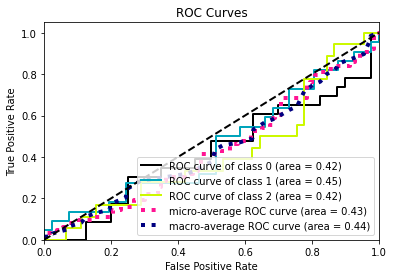

In [91]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = NB_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()


/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


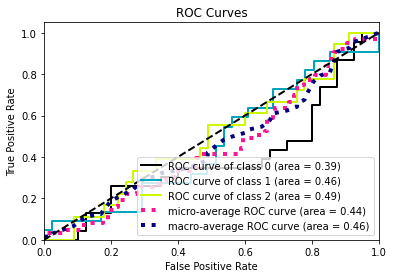

In [92]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = SVC_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


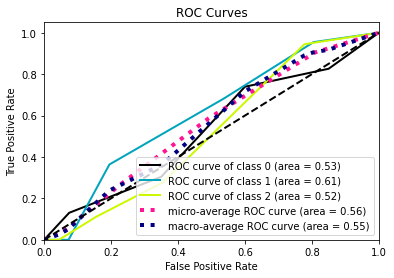

In [93]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = KNN_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


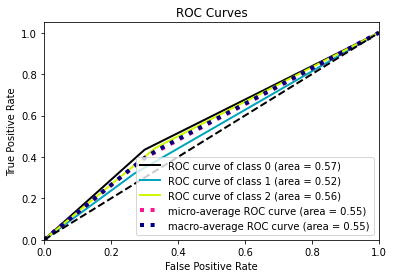

In [94]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = DecisionTree_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


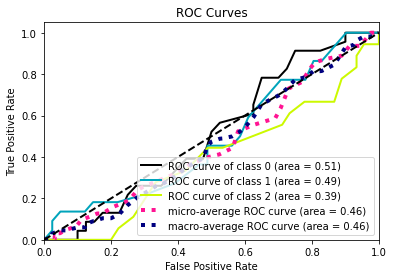

In [95]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = RandomForest_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

/home/habib/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


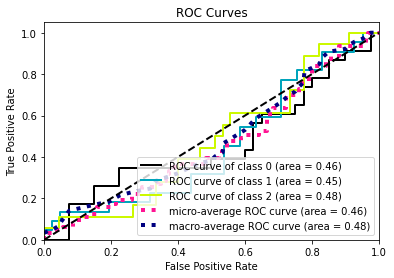

In [96]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = LogisticRegression_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()